In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin
from re import L
from numpy.ma.core import shape
from matplotlib import style
from pandas_datareader import data as pdr

In [2]:
#getting data

#needed to bypass yahoo 
yfin.pdr_override()

#function to collect the mean returns and covalance matrix
def get_data(stocks, start, end):
  stockData = pdr.get_data_yahoo(stocks, start, end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix


#stocks in my portfolio
stockList = ['BTC-USD','ETH-USD','LUNA1-USD','BNB-USD','ADA-USD']
stocks = [stock for stock in stockList]

endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=365)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

#weights for portfolio

# the original code gave random weights
#weights = np.random.random(len(meanReturns))
#weights = np.random.random(5)

# Giving the same weight to each cryto currency
weights = [0.2,0.2,0.2,0.2,0.2]
#weights /= np.sum(weights)
weights


[*********************100%***********************]  5 of 5 completed


[0.2, 0.2, 0.2, 0.2, 0.2]

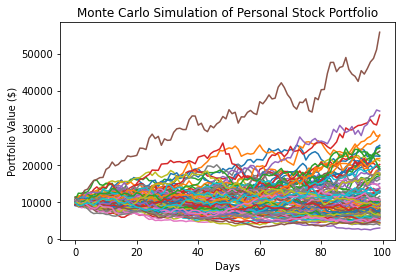

In [3]:
#Monte Carlo Method

#number of simulations
mc_sims = 100
T = 100 #timeframe in days

#empty arrays to fill with mean returns data based on number of days
meanM = np.full(shape=(T, len(weights)), fill_value= meanReturns)
meanM = meanM.T

#other array for portfolio returns data
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

#Cholesky Decomposition (used to determine Lower Triangular Matrix)
# Z are the samples from a normal distribution
for m in range(0, mc_sims):
  #mc loops
  Z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)
  #Assuming daily returns are distributed by a Multivariate Normal Distribution 
  dailyReturns = meanM + np.inner(L, Z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio




#MCS graph
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of Personal Crypto Portfolio')
plt.show()